# Final Report

The objectives for Part 3 of the AI Workflow Capstone are:
1. Build a draft version of an API with train, predict, and logfile endpoints.
2. Using Docker, bundle your API, model, and unit tests.
3. Using test-driven development iterate on your API in a way that anticipates scale, load, and drift.
4. Create a post-production analysis script that investigates the relationship between model performance and the business metric.
5. Articulate your summarized findings in a final report.

In this report, we will navigate through the artifacts in the repository and bundle, deploy and test the components. At this point you are either viewing the contents of the repository online or have downloaded it on to your desktop. The repository contains the all the artifacts of the AI Workflow Capstone Project including the following:
1. Python modules for the model, cslib, and logger with minor updates to the original version
2. Flask application for hosting the APIs for model train, predict, and log file access
3. Unit tests for API, model and logger as python modules
4. Dockerfile for deploying the Flask application and associated python modules as a Docker container
5. Final report as a Jupyter notebook (this document)


## Task 1 - Build and deploy the Python Flask Application and associated modules in a Docker container (objective 2)

The following steps are also provided in the README.md file of the repository, and require Docker installed in your local machine.

### Build docker image

In [3]:
!docker build --pull --rm -f "Dockerfile" -t aiworkflowcapstonesanujit:latest "."


Use 'docker scan' to run Snyk tests against images to find vulnerabilities and learn how to fix them


#1 [internal] load build definition from Dockerfile
#1 sha256:98cc4627a1cda5c2638789e4904379740d7428d5d05f1408a28401a3fa5f1bbe
#1 transferring dockerfile: 32B 0.0s done
#1 DONE 0.0s

#2 [internal] load .dockerignore
#2 sha256:d1004f8b762f39694688e3a1628aab5f5e1cd874f74b1270ca25948a3323b548
#2 transferring context: 2B done
#2 DONE 0.0s

#3 [internal] load metadata for docker.io/library/python:3.8-slim-buster
#3 sha256:a82ddfb0a3c3ab3f4e2ebc7582cec39f26df7d1ae41d54f70ea9fe596d7b25c7
#3 ...

#4 [auth] library/python:pull token for registry-1.docker.io
#4 sha256:90d1a156d4577c67bc684f2c7315b5a80c1f72a6bf7b9ab79659fb0e0778737e
#4 DONE 0.0s

#3 [internal] load metadata for docker.io/library/python:3.8-slim-buster
#3 sha256:a82ddfb0a3c3ab3f4e2ebc7582cec39f26df7d1ae41d54f70ea9fe596d7b25c7
#3 DONE 1.1s

#5 [1/5] FROM docker.io/library/python:3.8-slim-buster@sha256:bdc39f13da35be9a8e592f8f49d12a4552ffd3e90b1fb866f7ab628f3197609d
#5 sha256:7c5d89ff303be43a2a3bfeb54190379a82300a277ba8186ce791ab1e2

### Verify if image was created

In [4]:
!docker image ls

REPOSITORY                  TAG       IMAGE ID       CREATED          SIZE
aiworkflowcapstonesanujit   latest    c8868a41e85e   12 seconds ago   766MB


### Run the image in a container

In [5]:
!docker run -p 5000:5000 aiworkflowcapstonesanujit

^C


## Task 2a - Test APIs with train, predict and logfile endpoints (objectives 1 and 3)

The API for train, predict and logfile endpoints are built into the app.py Flask application and are provided below:
1. Train - http://localhost:5000/train with JSON input for mode indicating test flag
2. Predict - http://localhost:5000/predict with JSON input for country, year, month, and day
3. Log file - http://localhost:5000/logs/[filename] where filename is the logfile to be fetched


In [6]:
!python ./test_api.py

...
----------------------------------------------------------------------
Ran 3 tests in 43.745s

OK


## Task 2b - Test model train, load and predict  (objective 3)

In [7]:
!python ./test_model.py

... loading ts data from files
... loading ts data from files
... loading ts data from files
2018-01-05
... test flag on
...... subseting data
...... subseting countries
... loading ts data from files
... saving test version of model: models\test-all-0_1.joblib
... saving test version of model: models\test-united_kingdom-0_1.joblib


...
----------------------------------------------------------------------
Ran 3 tests in 84.532s

OK


## Task 2c - Test logger (objective 3)

In [8]:
!python ./test_logger.py

..
----------------------------------------------------------------------
Ran 2 tests in 0.003s

OK


## Task 2d - Run all tests at once

In [9]:
!python ./test_all.py

... loading ts data from files

........
----------------------------------------------------------------------
Ran 8 tests in 123.209s

OK



... loading ts data from files
... loading ts data from files
2018-01-05
... test flag on
...... subseting data
...... subseting countries
... loading ts data from files
... saving test version of model: models\test-all-0_1.joblib
... saving test version of model: models\test-united_kingdom-0_1.joblib


## Task 3 - Post-production analysis (objective 4)

In this step we will analyze model performance and the business metrics aligned with the deployed model. 

Loading Models
... loading ts data from files
... models loaded:  all,eire,france,germany,hong_kong,netherlands,norway,portugal,singapore,spain,united_kingdom
... loading ts data from files
2019-01-01
... loading ts data from files
2019-01-02
... loading ts data from files
2019-01-03
... loading ts data from files
2019-01-04
... loading ts data from files
2019-01-05


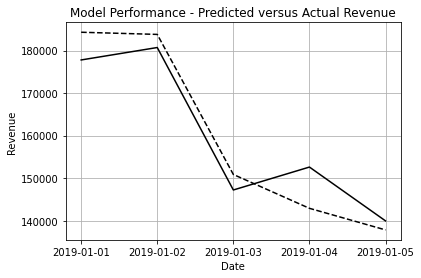

In [10]:
import matplotlib.pyplot as plt
from monitoring import model_monitor

# Set inputs for model predictions

# Country selects the model
country = 'all'

# Start date
year = '2019'
month = '01'
day = '01'

# Number of days to predict including start date
number_of_days = 5

# Run monitoring script to fetch revenue predictions and actuals
dates, predictions, actuals = model_monitor(country,year,month,day,number_of_days)

# Plot model performance
fig, ax = plt.subplots()
ax.plot(dates, predictions, 'k', label='Predicted')
ax.plot(dates, actuals, 'k--', label='Actual')
ax.set(xlabel='Date', ylabel='Revenue',
       title='Model Performance - Predicted versus Actual Revenue')
ax.grid()
plt.show()


## Summary of findings (objective 5)

The model execution time performance can be improved further specifically related to the I/O associated with loading of the model and data. The prediction part itself performs well.